In [1]:
import sys
sys.path.append('../../Classes')
from DataHandler import DataHandler
from RFModelTrainer import RFModelTrainer
from RFModelTester import RFModelTester

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

### Model

In [3]:
data = DataHandler(validation_sample= False, features_txt= 'all_features.txt', fields_list=['W02'])
data.main()

trainer = RFModelTrainer(data = data, name = 'all_features')
trainer.load_model()

tester = RFModelTester(model= trainer.model, data= data, name= 'test')
# tester.predict()

Training: 23224 members, 47862 non members
Testing: 9953 members, 20513 non members
----------------------------------------------------------------------


### Importances

##### Gini importance

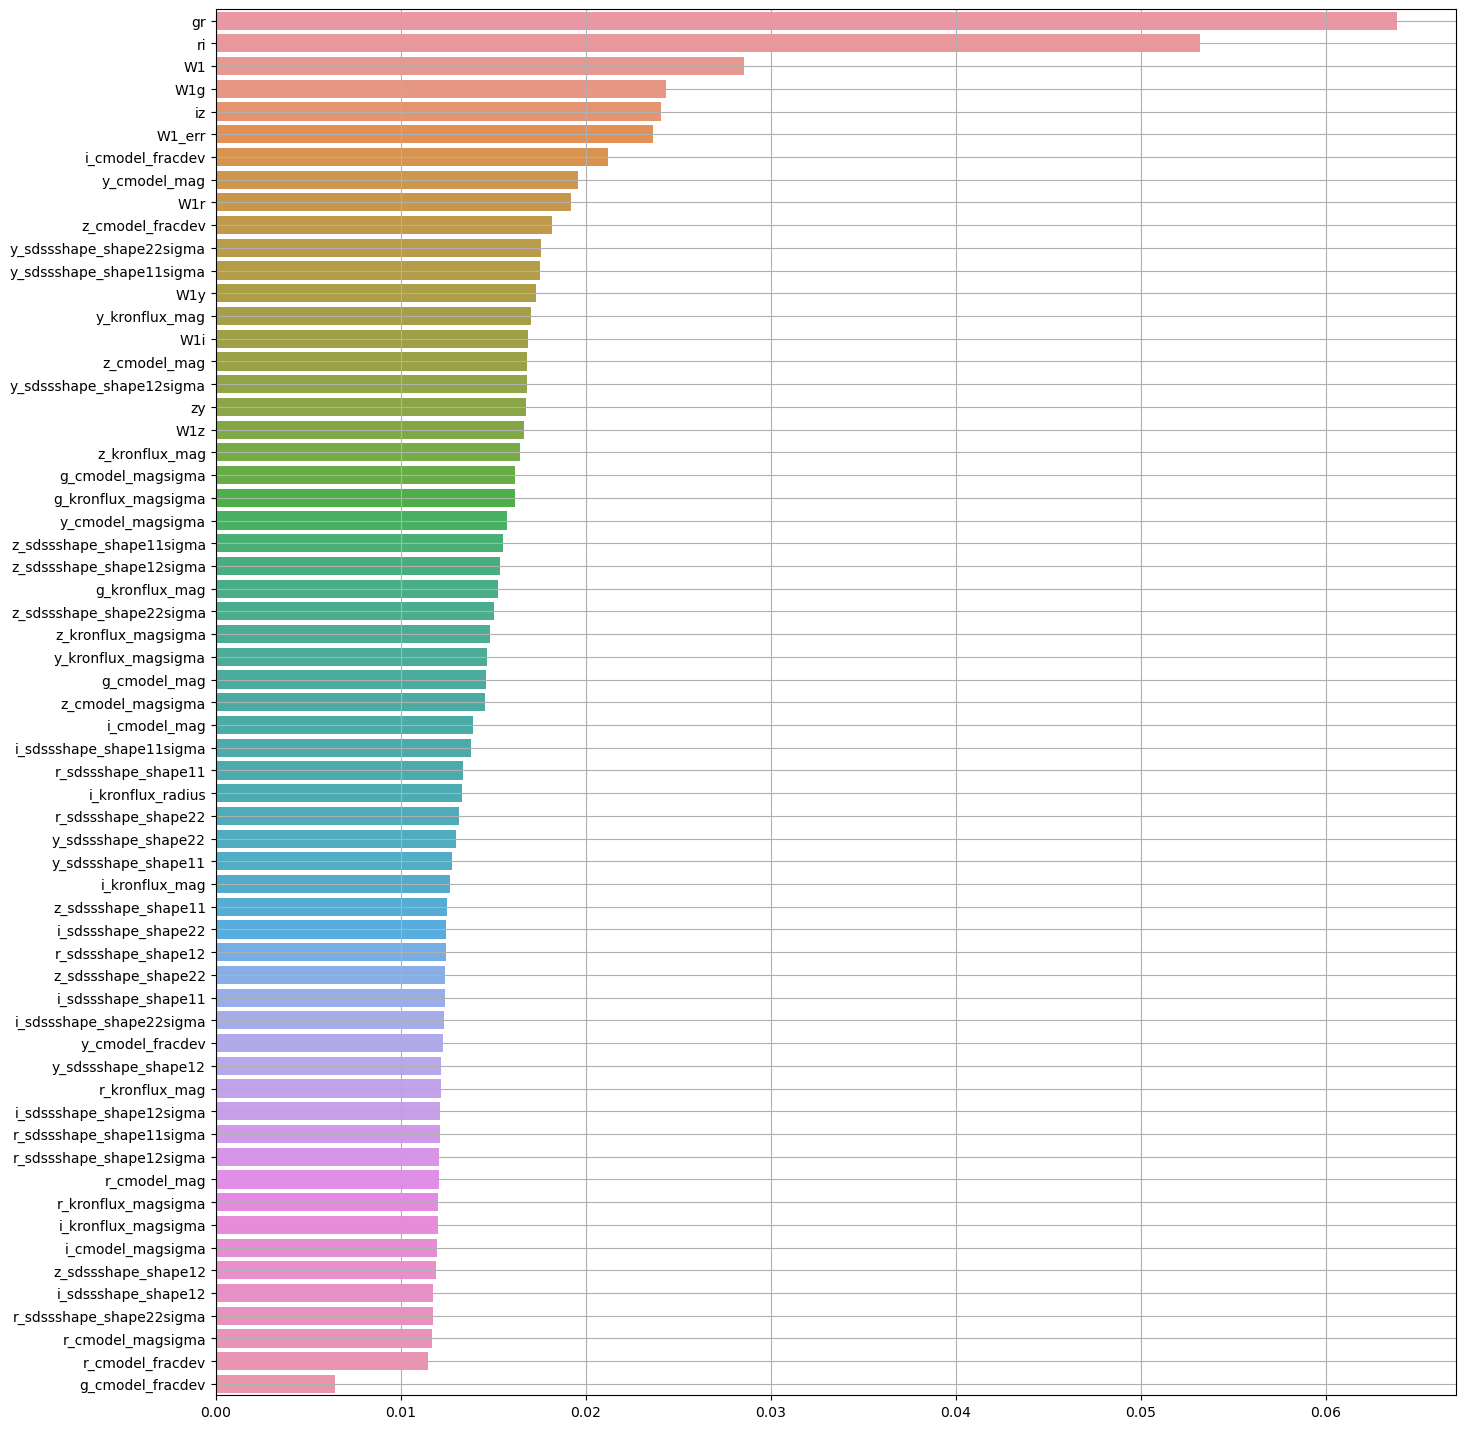

In [40]:
tester.plot_importances(to_file= False)

##### Permutation importance

In [4]:
from sklearn.inspection import permutation_importance
pi = permutation_importance(trainer.model, data.testing_features(), data.testing_labels(), scoring= ['average_precision'], n_jobs= 4)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.1s
[Para

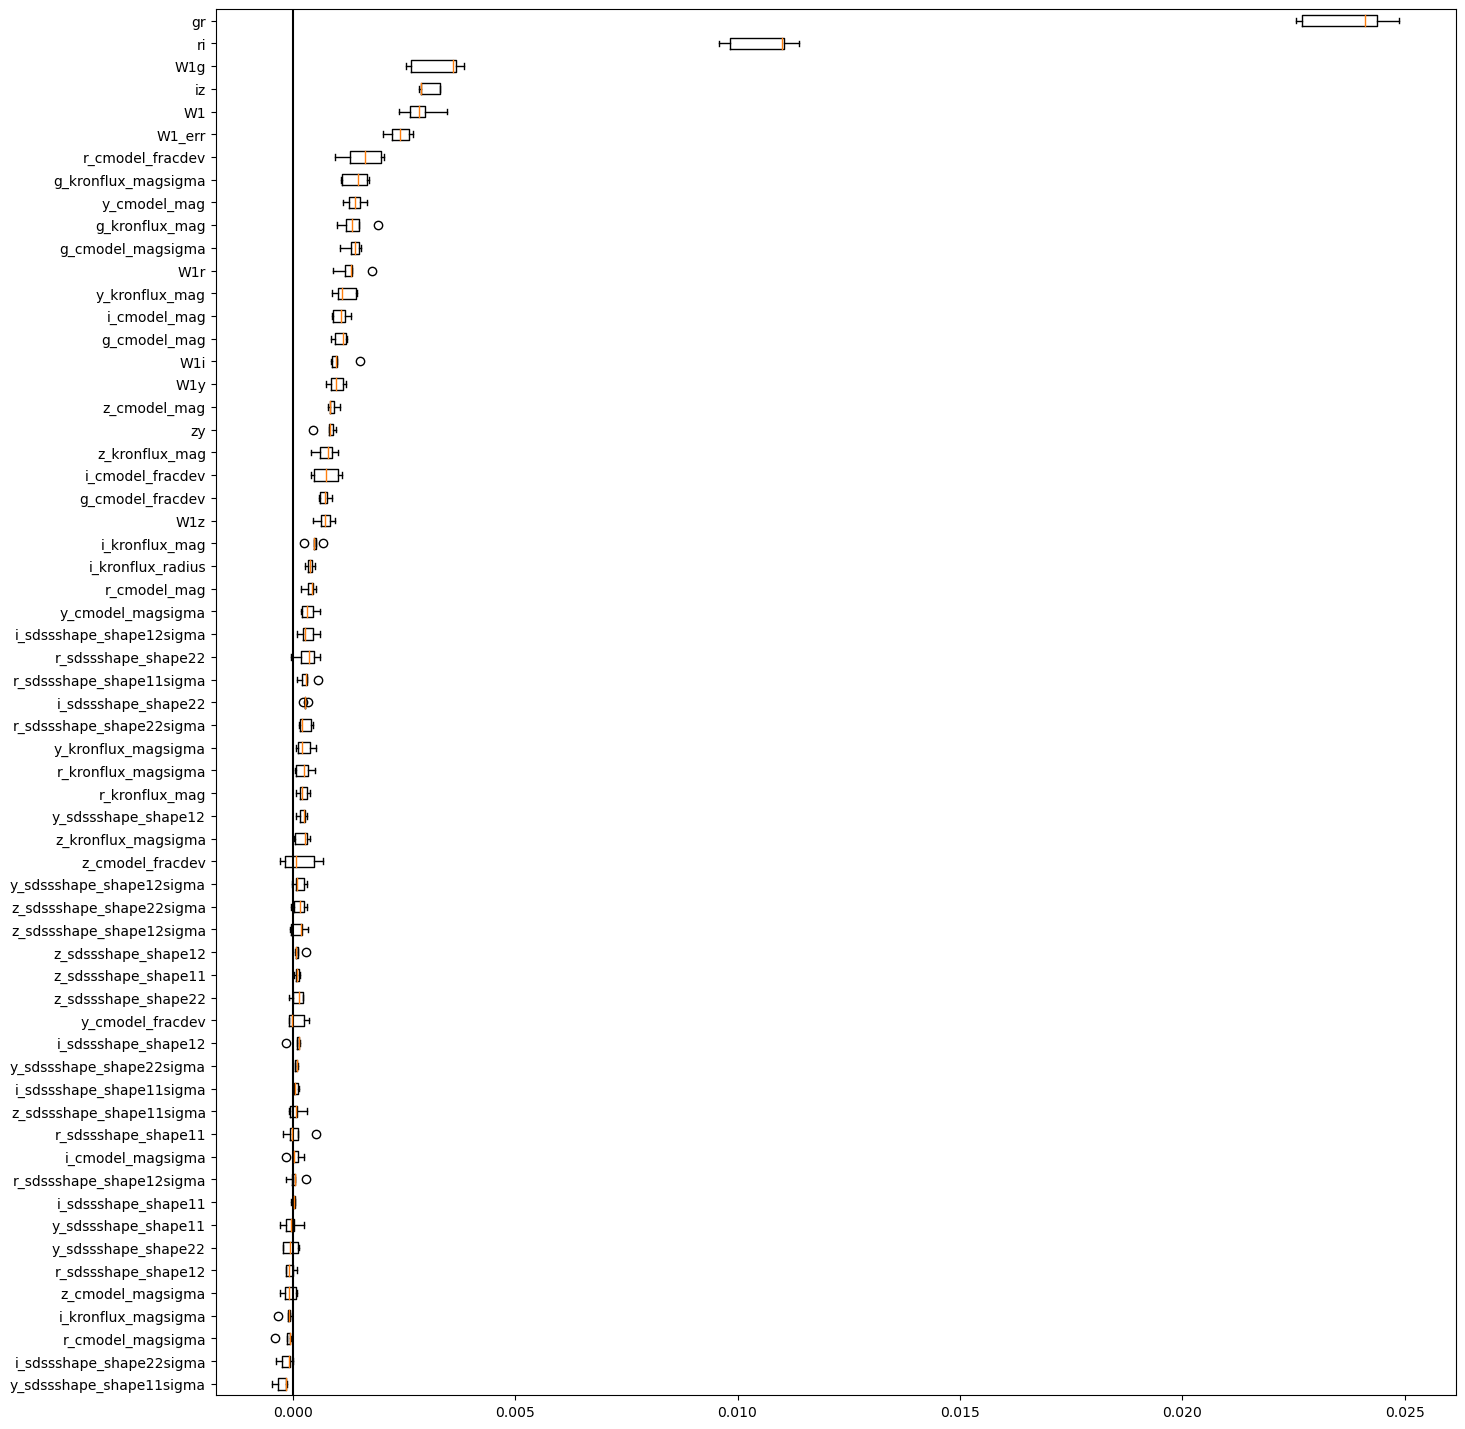

In [18]:
plt.figure(figsize= (16, 18))
sorted_idx = pi['roc_auc'].importances_mean.argsort()
plt.boxplot(pi['roc_auc'].importances[sorted_idx].T, vert = False, labels = np.array(data.features)[sorted_idx])
plt.axvline(x = 0, color = 'k')

##### Shap

In [3]:
import shap
explainer = shap.TreeExplainer(trainer.model)

sample = data.testing.sample(100)
shap_values = explainer.shap_values(sample[data.features], sample[data.labels])
explanation = explainer(sample[data.features], sample[data.labels])

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


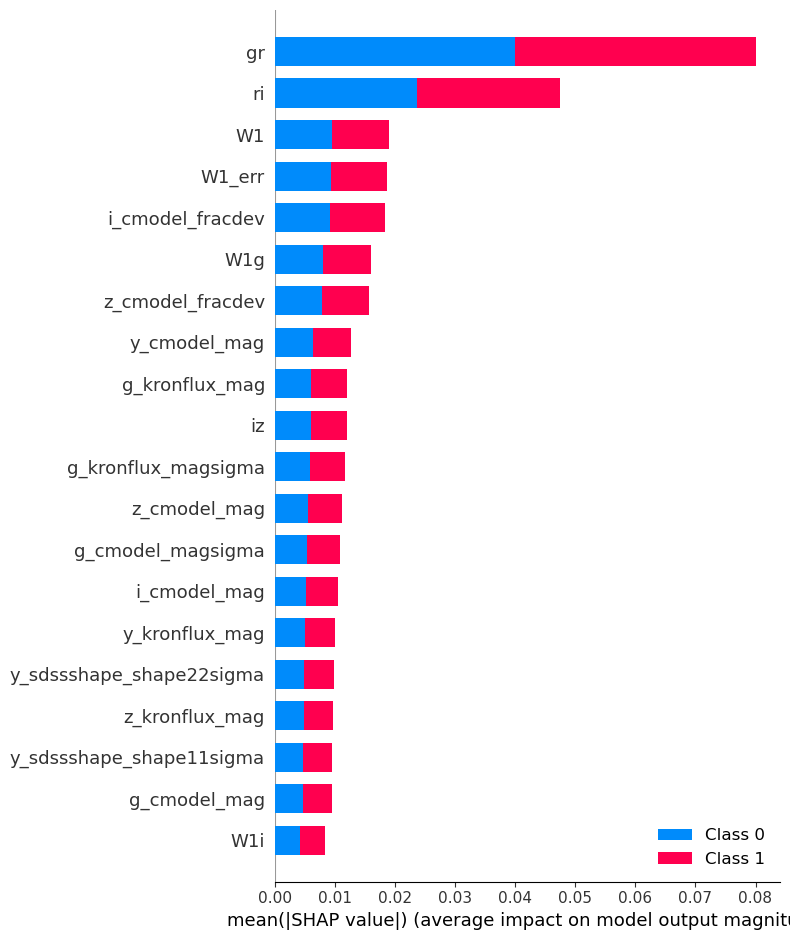

In [37]:
shap.summary_plot(shap_values, sample[data.features])

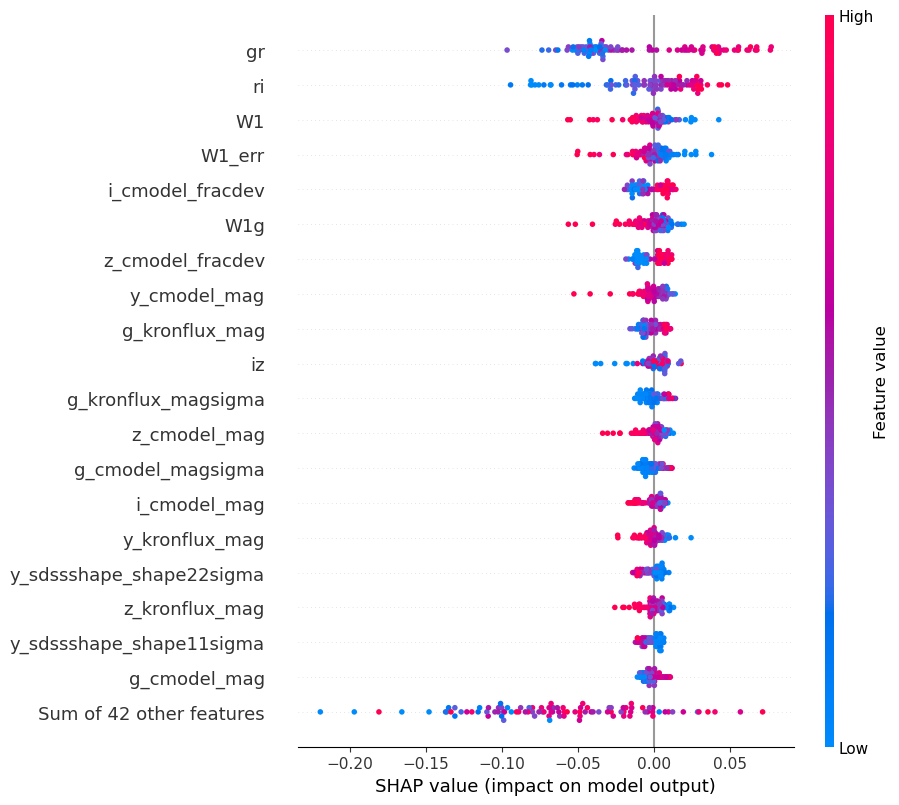

In [39]:
shap.plots.beeswarm(explanation[:,:,1], max_display = 20)

#### Combined

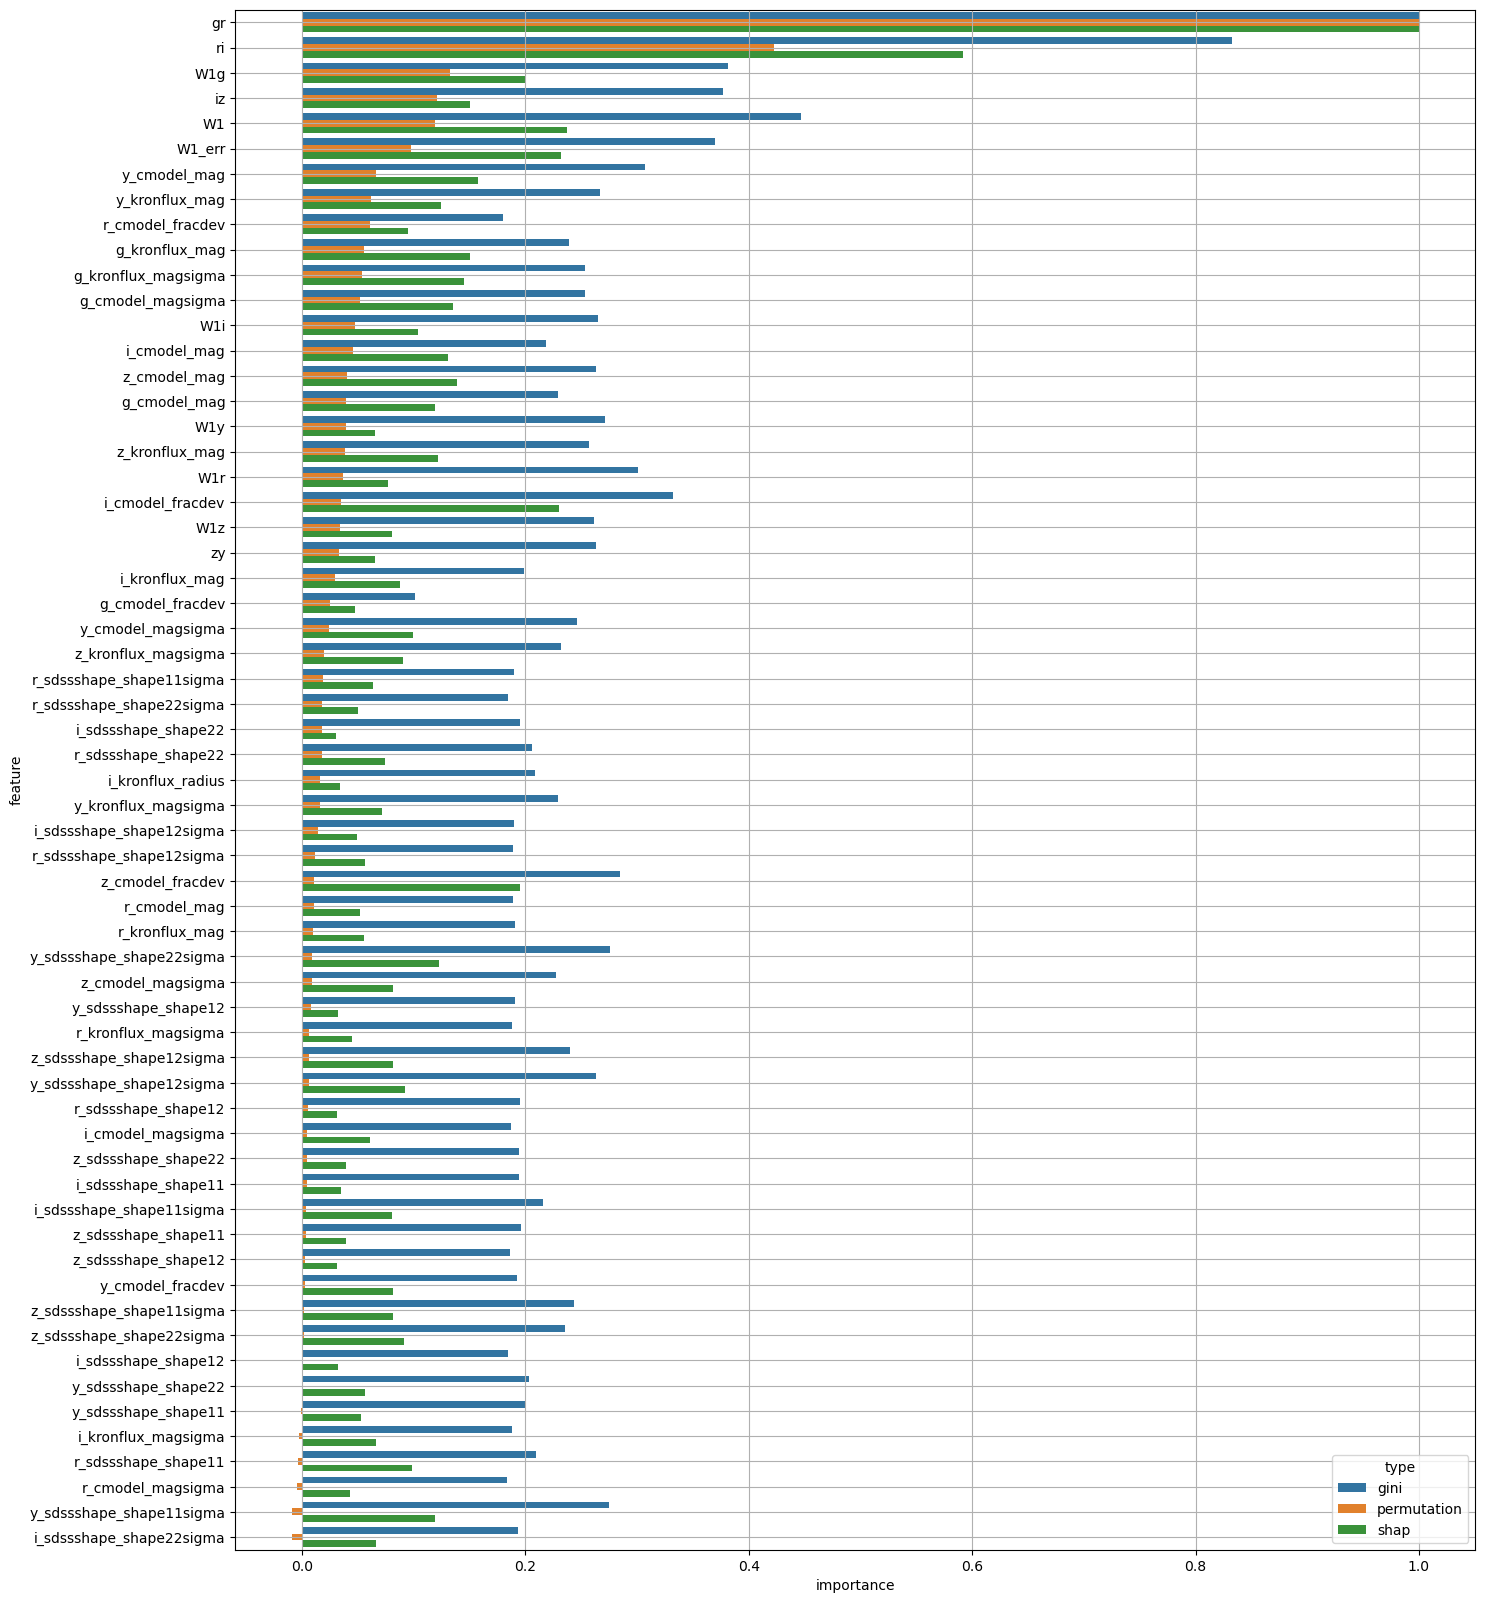

In [102]:
plt.figure(figsize= (16, 20))

gini = trainer.model.feature_importances_
perm = pi['roc_auc'].importances_mean
sh = np.array([np.mean(abs(s)) for s in shap_values[0].transpose()])
importances = pd.DataFrame(dict(gini = gini/max(gini), permutation = perm/max(perm), shap = sh/max(sh), feature = data.features))
importances = importances.sort_values(by = 'permutation', ascending= False)
importances = pd.melt(importances, var_name="type", value_name="importance", id_vars= 'feature')

# sns.barplot(x = gini / max(gini) , y = data.features, color = 'r')
# sns.barplot(x = perm / max(perm), y = data.features, color = 'g')
# sns.barplot(x = sh / max(sh), y = data.features, color = 'b')
sns.barplot(data = importances, x = 'importance', y = 'feature', hue = 'type', orient = 'h')
plt.grid()
plt.show()     

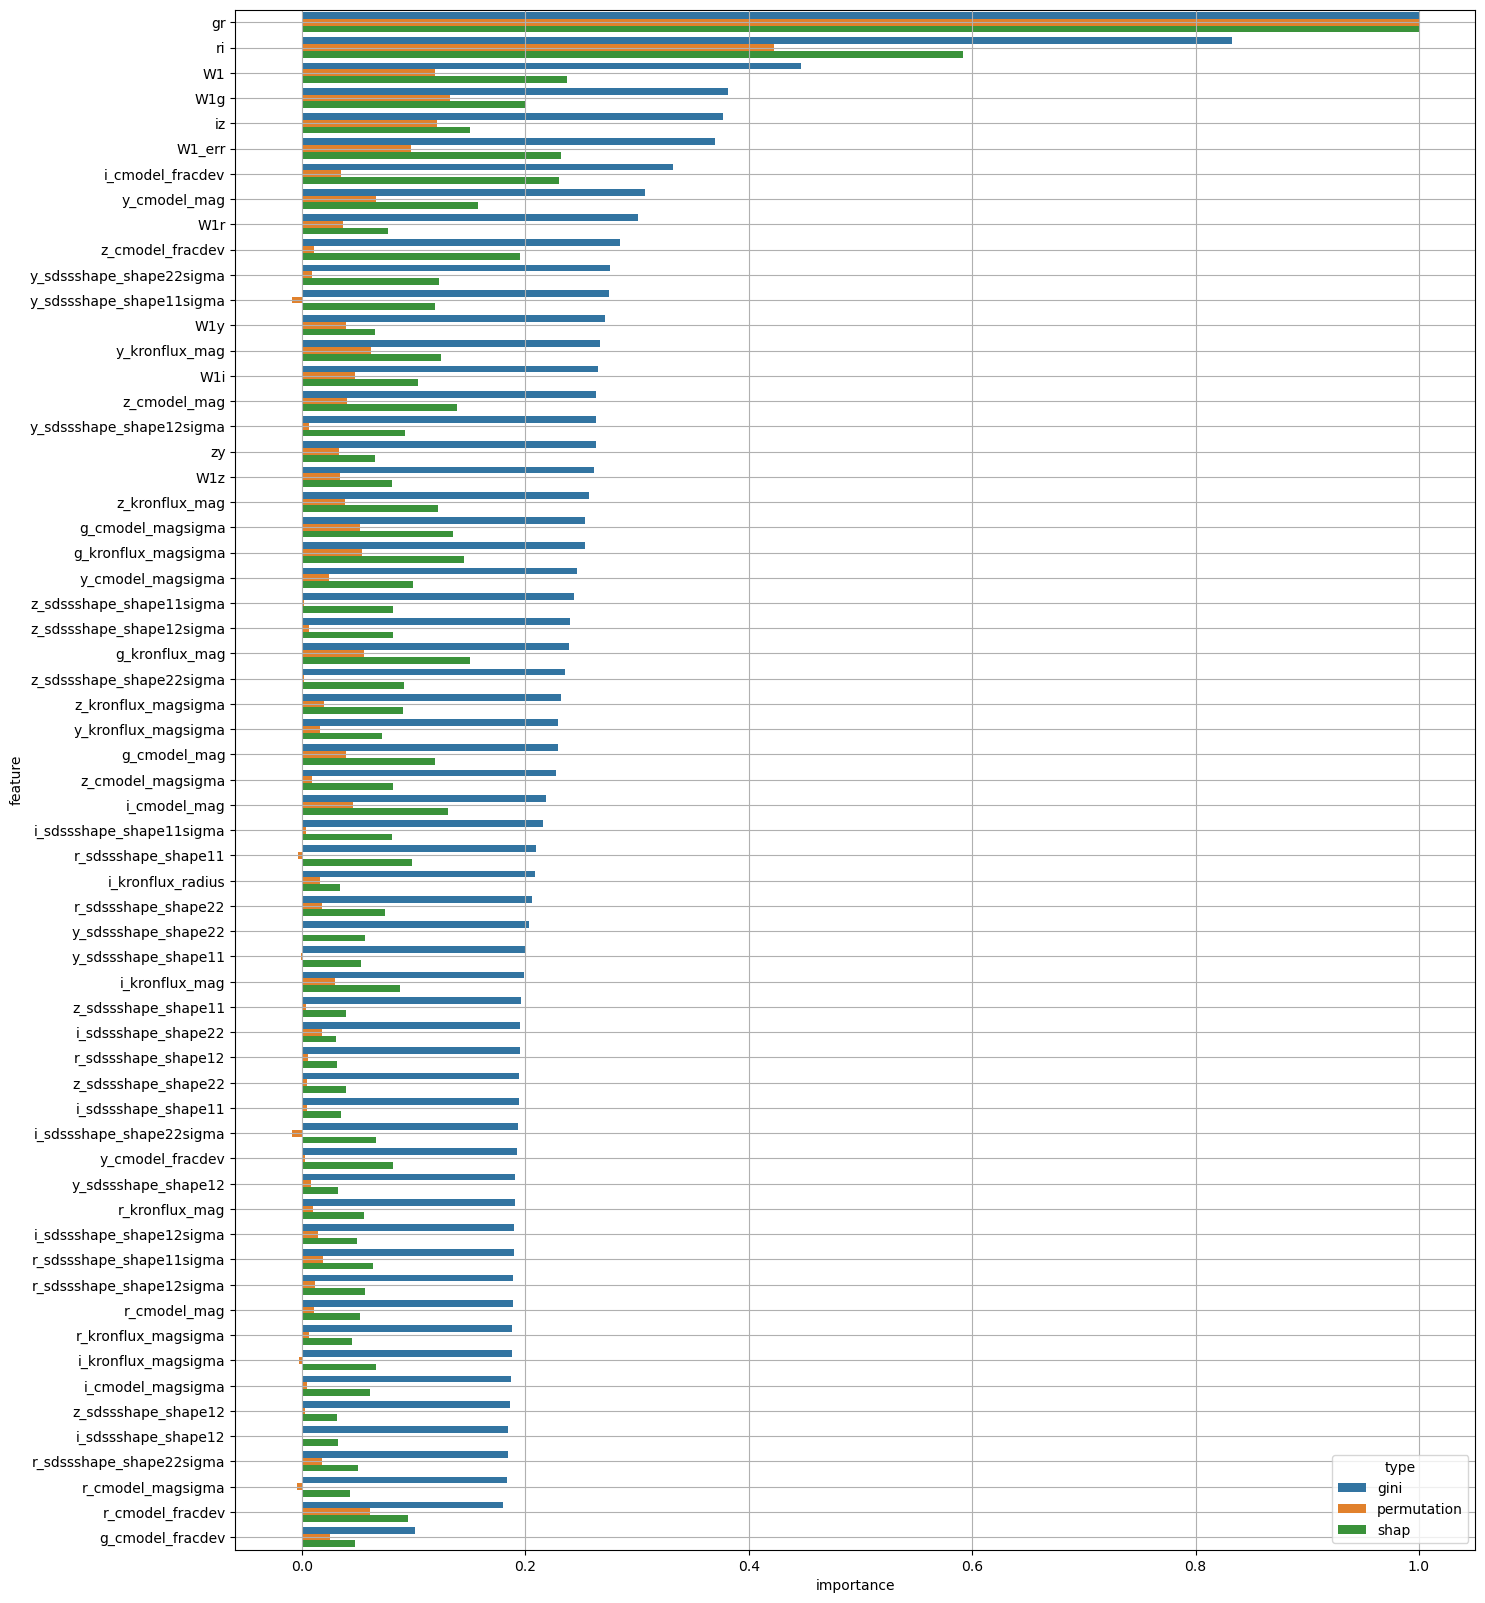

In [103]:
plt.figure(figsize= (16, 20))

gini = trainer.model.feature_importances_
perm = pi['roc_auc'].importances_mean
sh = np.array([np.mean(abs(s)) for s in shap_values[0].transpose()])
importances = pd.DataFrame(dict(gini = gini/max(gini), permutation = perm/max(perm), shap = sh/max(sh), feature = data.features))
importances = importances.sort_values(by = 'gini', ascending= False)
importances = pd.melt(importances, var_name="type", value_name="importance", id_vars= 'feature')

# sns.barplot(x = gini / max(gini) , y = data.features, color = 'r')
# sns.barplot(x = perm / max(perm), y = data.features, color = 'g')
# sns.barplot(x = sh / max(sh), y = data.features, color = 'b')
sns.barplot(data = importances, x = 'importance', y = 'feature', hue = 'type', orient = 'h')
plt.grid()
plt.show()     

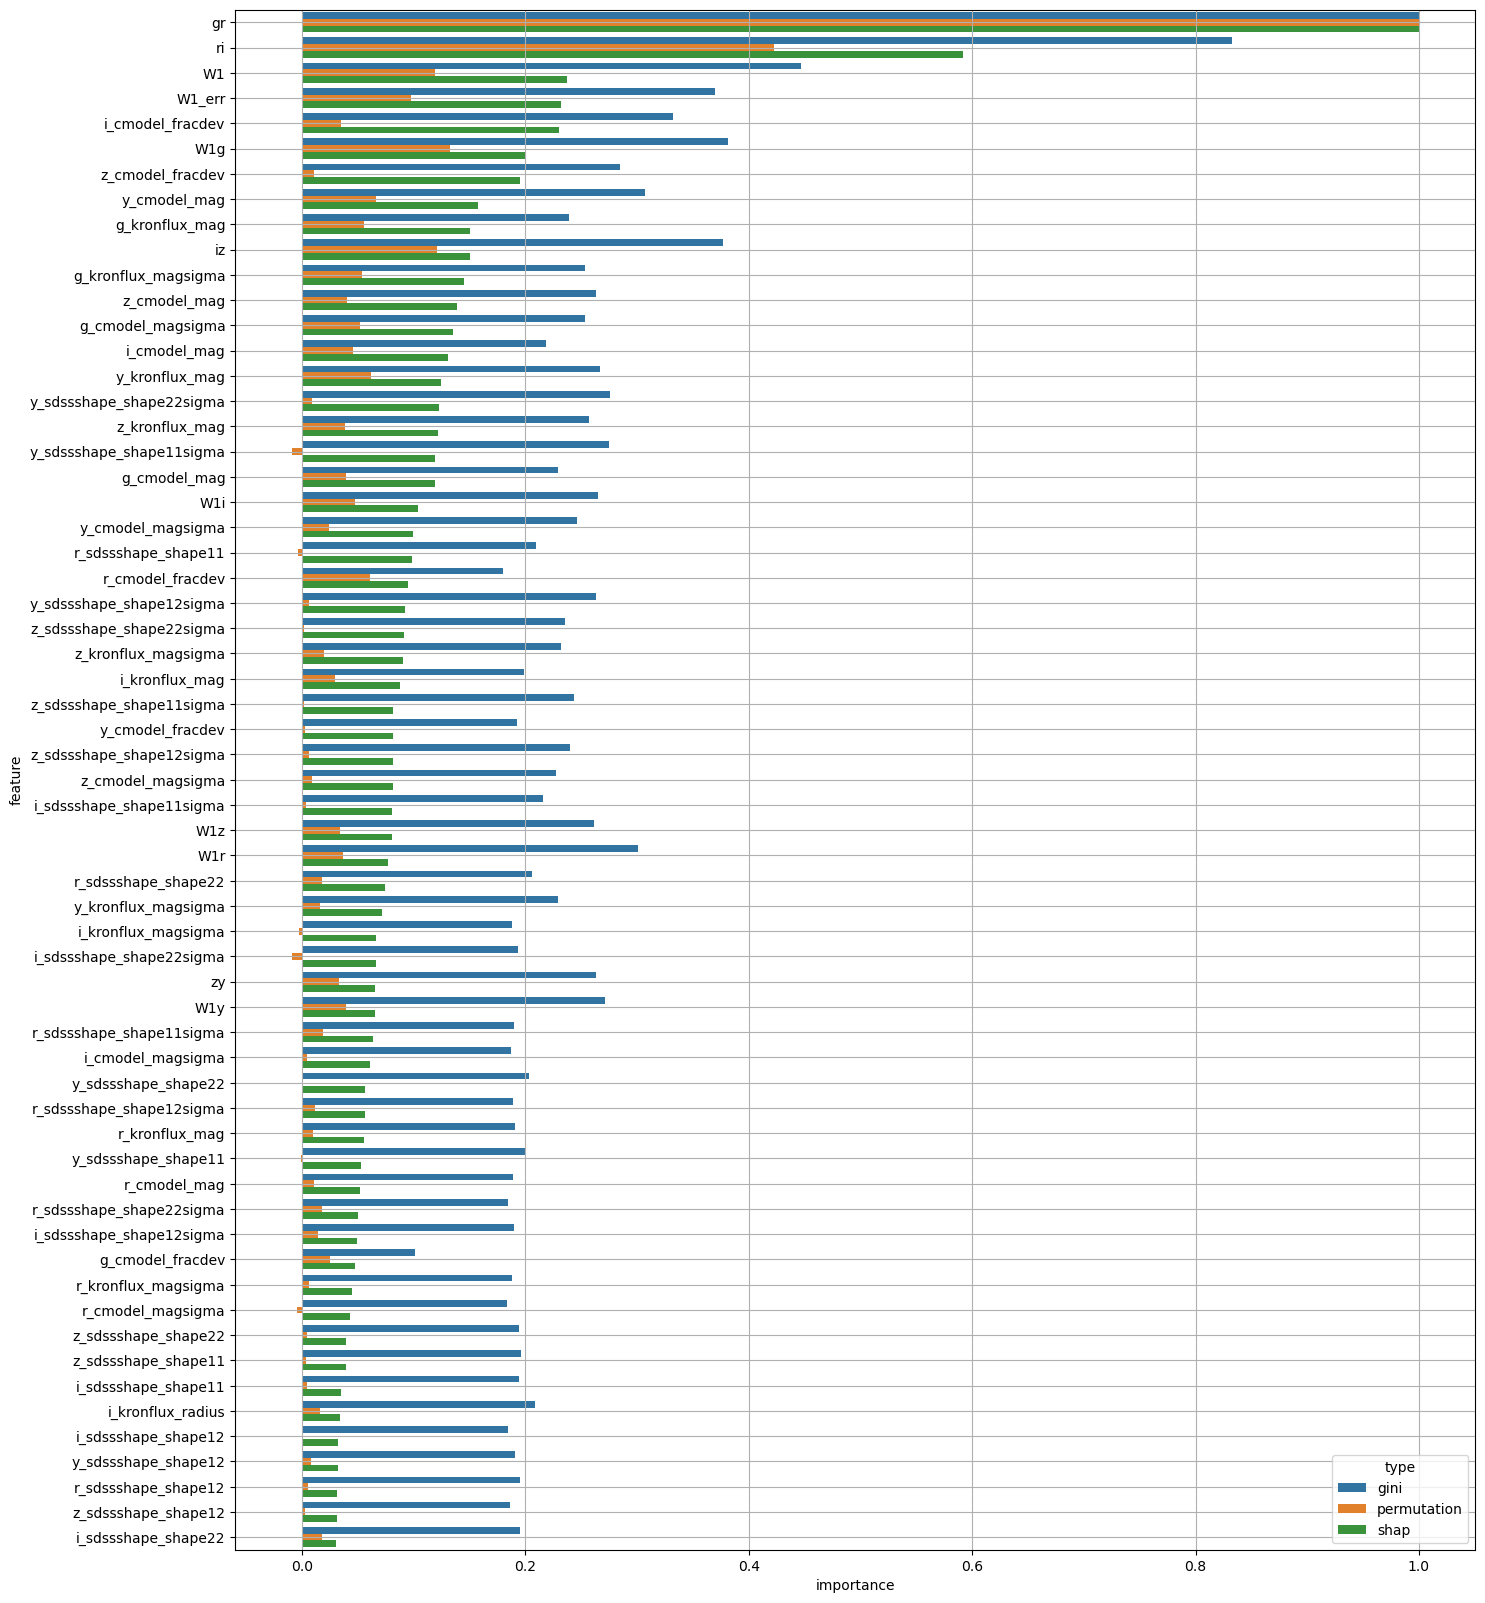

In [104]:
plt.figure(figsize= (16, 20))

gini = trainer.model.feature_importances_
perm = pi['roc_auc'].importances_mean
sh = np.array([np.mean(abs(s)) for s in shap_values[0].transpose()])
importances = pd.DataFrame(dict(gini = gini/max(gini), permutation = perm/max(perm), shap = sh/max(sh), feature = data.features))
importances = importances.sort_values(by = 'shap', ascending= False)
importances = pd.melt(importances, var_name="type", value_name="importance", id_vars= 'feature')

# sns.barplot(x = gini / max(gini) , y = data.features, color = 'r')
# sns.barplot(x = perm / max(perm), y = data.features, color = 'g')
# sns.barplot(x = sh / max(sh), y = data.features, color = 'b')
sns.barplot(data = importances, x = 'importance', y = 'feature', hue = 'type', orient = 'h')
plt.grid()
plt.show()     

#### Combined gini + permutation

In [3]:
from sklearn.inspection import permutation_importance
pi = permutation_importance(trainer.model, data.testing_features(), data.testing_labels(), scoring= ['average_precision'], n_jobs= -1)

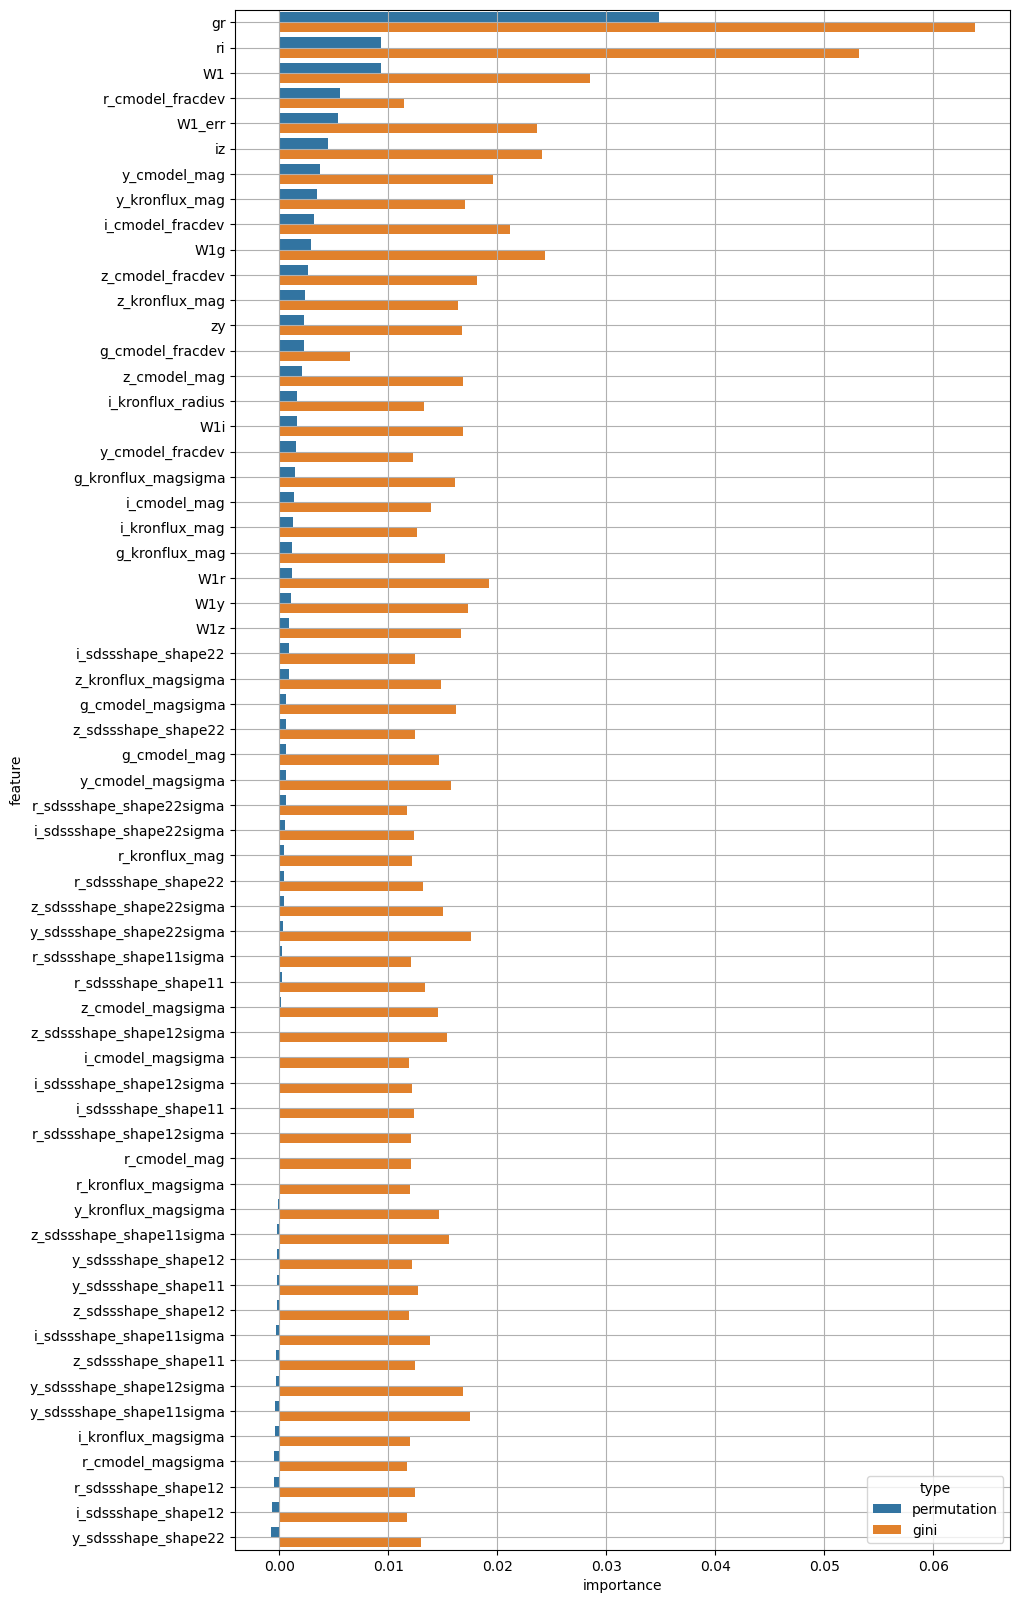

In [19]:
plt.figure(figsize= (10, 20))

gini = trainer.model.feature_importances_
perm = pi['average_precision'].importances_mean
importances = pd.DataFrame(dict(permutation = perm, gini = gini, feature = data.features))
importances = importances.sort_values(by = 'permutation', ascending= False)
importances = pd.melt(importances, var_name="type", value_name="importance", id_vars= 'feature')

sns.barplot(data = importances, x = 'importance', y = 'feature', hue = 'type', orient = 'h')
plt.grid()
plt.show()     

In [18]:
len(data.features)

61